# Import libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Import Dataset

In [ ]:
# Get dataset
df = pd.read_csv('/content/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Analyze data

# Describe

In [ ]:
# Describe data
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<ipython-input-7-c31e1624198b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X3 distance to the nearest MRT station'])


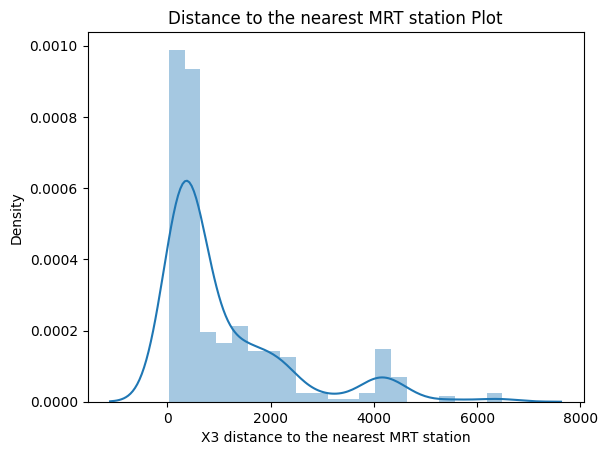

In [ ]:
# Data distribution
plt.title('Distance to the nearest MRT station Plot')
sns.distplot(df['X3 distance to the nearest MRT station'])
plt.show()

 The plot visualizes the distribution of this variable.\
 Key takeaways from the graph:

Type of distribution: The shape of the distribution suggests it might be a right-skewed distribution. This means that most data points are clustered towards the left side of the plot, with a few data points extending towards the right.

Central tendency: The highest point of the distribution is around the value of 5, indicating that many data points are located around this value. This suggests that most MRT stations are within a distance of 5 units from the observed locations.

Spread: The distribution appears to be relatively spread out, indicating that there is a considerable variation in the distances to the nearest MRT station. Some data points are quite far from the MRT stations, while others are very close.

Outliers: There might be a few potential outliers on the right side of the distribution, representing data points with significantly larger distances to the nearest MRT station compared to the majority of the data.

<ipython-input-8-3d771e569518>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Y house price of unit area'])


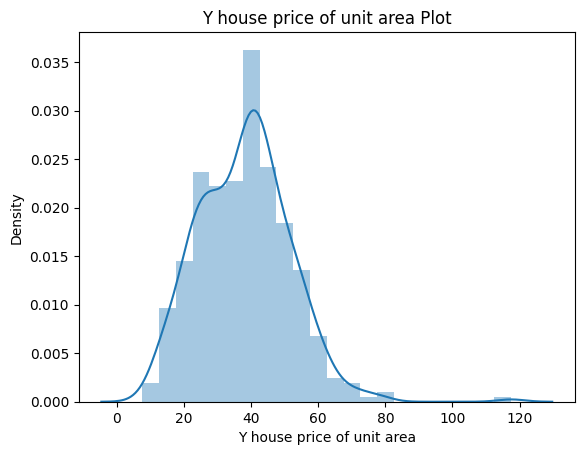

In [ ]:
# Data distribution
plt.title('Y house price of unit area Plot')
sns.distplot(df['Y house price of unit area'])
plt.show()

The plot visualizes the distribution of this variable.

Key takeaways from the graph:

Type of distribution: The shape of the distribution suggests it might be a bimodal distribution. This means that there appear to be two distinct groups of data points, one centered around a lower value and another centered around a higher value.

Central tendency: The two peaks of the distribution are around the values of 15 and 35. This suggests that there are two groups of houses, one with lower prices per unit area and another with higher prices per unit area.

Spread: The distribution appears to be relatively spread out for both groups, indicating that there is a considerable variation in the house prices per unit area within each group.

Outliers: There might be a few potential outliers on both sides of the distribution, representing houses with significantly lower or higher prices per unit area compared to the majority of the data.

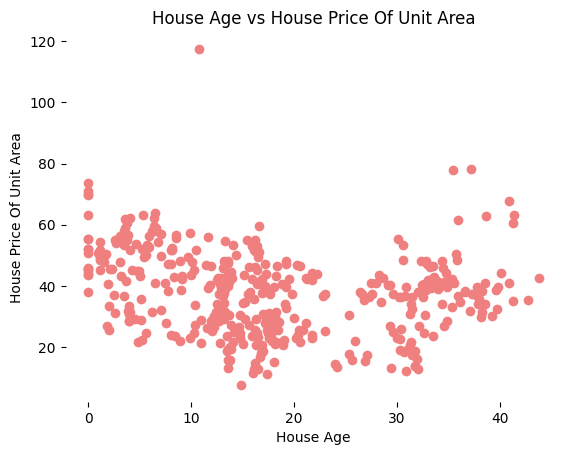

In [ ]:
# Relationship between House Age And House Price Of Unit Area
plt.scatter(df['X2 house age'], df['Y house price of unit area'], color = 'lightcoral')
plt.title('House Age vs House Price Of Unit Area')
plt.xlabel('House Age')
plt.ylabel('House Price Of Unit Area')
plt.box(False)
plt.show()

scatter plot to visualize the relationship between two variables: X2 house age and Y house price of unit area from a dataframe df.

Key takeaways from the graph:

General trend: There appears to be a weak positive correlation between house age and house price per unit area. This means that as the house age increases, the house price per unit area tends to increase slightly.

Data distribution: The data points are spread out across the plot, indicating that there is considerable variation in both house age and house price per unit area.

Outliers: There are a few potential outliers, represented by data points that are significantly above or below the general trend. These outliers might represent unusual houses with either very high or very low prices compared to their age.

No clear pattern: While there is a slight positive correlation, there is no clear or strong pattern to suggest that house age is a reliable predictor of house price per unit area.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


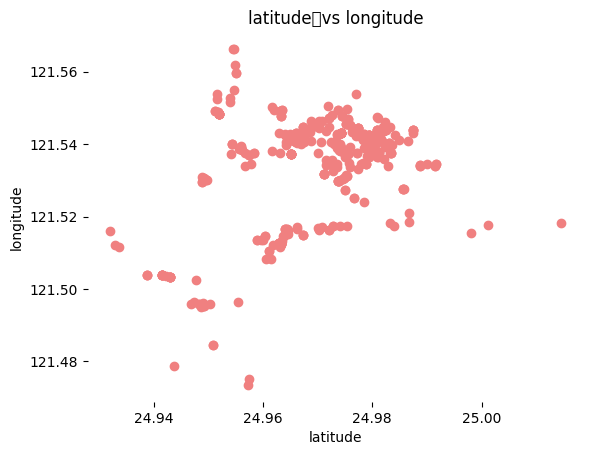

In [ ]:
# Relationship between  latitude	And longitude
plt.scatter(df['X5 latitude'], df['X6 longitude'], color = 'lightcoral')
plt.title('latitude	vs longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.box(False)
plt.show()

scatter plot to visualize the relationship between two variables: X5 latitude and X6 longitude from a dataframe df.

Key takeaways from the graph:

Data distribution: The data points are clustered in certain areas of the plot, suggesting that there might be specific regions or concentrations of data.

No clear pattern: There is no clear or discernible pattern or correlation between latitude and longitude in this plot. The data points appear to be scattered randomly across the plot.

Outliers: There are a few potential outliers, represented by data points that are significantly far away from the main clusters. These outliers might represent unusual locations that are significantly different from the majority of the data.

In [ ]:
# Splitting variables
X = df.iloc[:, 2:3].values # independent
y = df.iloc[:, -1].values # dependent


In [ ]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [ ]:
# Predict results
y_pred_lr = lr.predict(X) # Linear Regression
y_pred_poly = lr_2.predict(X_poly) # Polynomial Regression

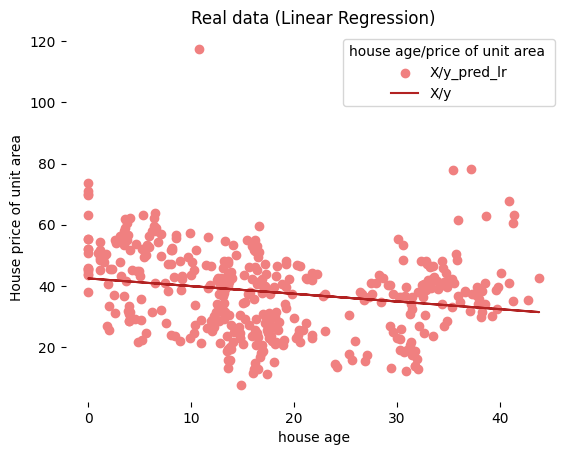

In [ ]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('house age')
plt.ylabel('House price of unit area')
plt.legend(['X/y_pred_lr', 'X/y'], title ='house age/price of unit area ', loc='best', facecolor='white')
plt.box(False)
plt.show()

scatter plot with a linear regression line to visualize the relationship between two variables: X (house age) and y (house price per unit area).

Key takeaways from the graph:

Data distribution: The data points are spread out across the plot, indicating that there is considerable variation in both house age and house price per unit area.

Linear regression line: The red line represents the linear regression model that has been fitted to the data. This line shows the predicted house price per unit area for a given house age.

General trend: The linear regression line suggests a positive correlation between house age and house price per unit area. This means that as the house age increases, the predicted house price per unit area also tends to increase.

Model fit: The closeness of the data points to the regression line indicates how well the linear regression model fits the data. In this case, there appears to be some variation around the line, suggesting that the model might not perfectly capture the relationship between the variables.

<ipython-input-60-9083ebbb9de0>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


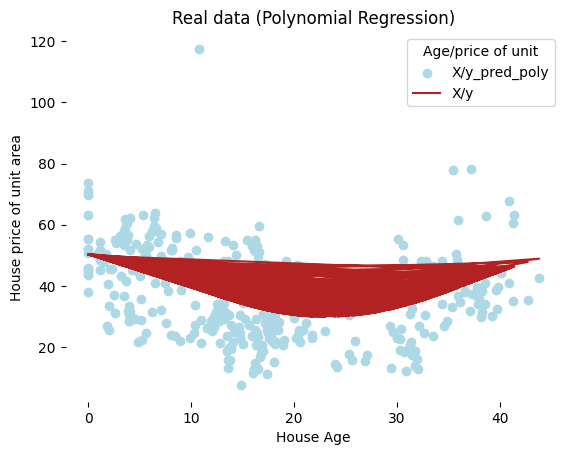

In [ ]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightBlue')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('House Age')
plt.ylabel('House price of unit area')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Age/price of unit', loc='best', facecolor='white')
plt.box(False)
plt.show()

scatter plot with a polynomial regression line to visualize the relationship between two variables: X (house age) and y (house price per unit area).

Key takeaways from the graph:

Data distribution: The data points are spread out across the plot, indicating that there is considerable variation in both house age and house price per unit area.

Polynomial regression line: The red line represents the polynomial regression model that has been fitted to the data. This line shows the predicted house price per unit area for a given house age.

General trend: The polynomial regression line suggests a non-linear relationship between house age and house price per unit area. This means that the relationship *cannot be accurately captured by a straight line.*

Model fit: The closeness of the data points to the regression line indicates how well the polynomial regression model fits the data. In this case, the line appears to capture the overall trend of the data more closely than the linear regression line in the previous example.

**Predict a new result with linear regression and With polynomial regression** For Housing Age And House Price of unit area

In [ ]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[6.5]])}')
# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[6.5]]))}')

Linear Regression result : [40.80002232]
Polynomial Regression result : [44.32142782]


# For X3 distance to the nearest MRT station And 	Y house price of unit area

In [ ]:
# Splitting variables
X = df.iloc[:, 3:4].values # independent
y = df.iloc[:, -1].values # dependent

In [ ]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)


LinearRegression()

In [ ]:
# Predict results
y_pred_lr = lr.predict(X) # Linear Regression
y_pred_poly = lr_2.predict(X_poly) # Polynomial Regression

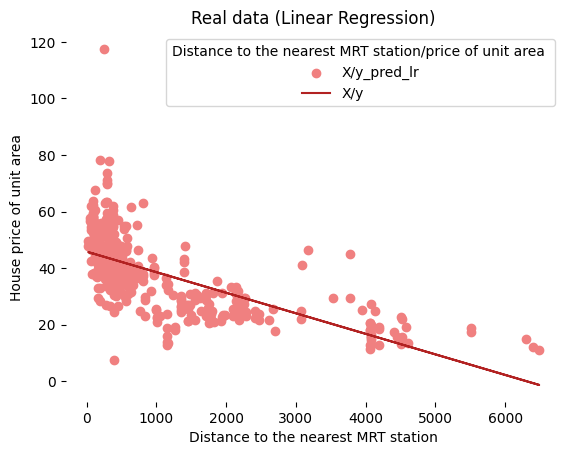

In [ ]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.legend(['X/y_pred_lr', 'X/y'], title ='Distance to the nearest MRT station/price of unit area ', loc='best', facecolor='white')
plt.box(False)
plt.show()

<ipython-input-67-2a959fc89e4d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


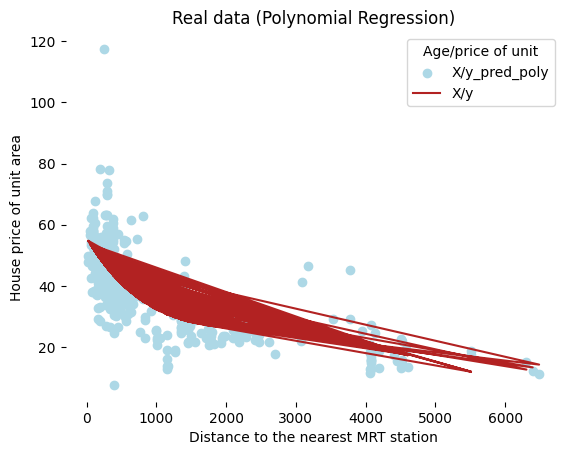

In [ ]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightBlue')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Distance to the nearest MRT station/price of unit', loc='best', facecolor='white')
plt.box(False)
plt.show()